In [48]:
# pip install opencv-python
# pip install pillow
# pip install tensorflow
# pip install keras

In [6]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
# from scipy.misc.pilutil import imread
from matplotlib.image import imread

In [7]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [28]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [39]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

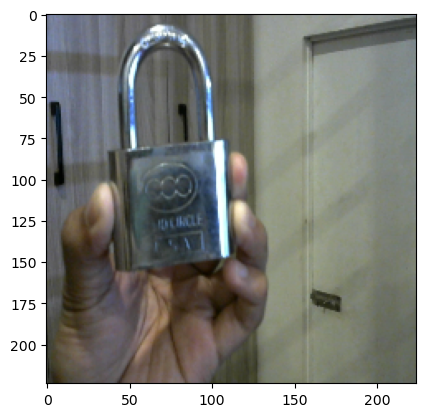

In [40]:
plt.imshow(imread(img_path))

In [12]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 733s 1us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [55]:
from keras.applications import resnet50

In [43]:
resnet50_model = resnet50.ResNet50(weights='imagenet')
resnet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [52]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


,Predicted Class,Name,Probability
0,n03075370,combination_lock,0.990506
1,n03874599,padlock,0.009392
2,n04254120,soap_dispenser,0.000026
3,n04372370,switch,0.000024
4,n03532672,hook,0.000013
5,n04125021,safe,0.000013
6,n04005630,prison,0.000003
7,n04553703,washbasin,0.000002
8,n02992529,cellular_telephone,0.000002
9,n04141975,scale,0.000002


Interpret the result of prediction using VGG16 model.
- The VGG16 model has a high probability score when it comes to its predictions, as it has scored a 99% probability score. We will get to see the other performances of the models that will be trained later, when compared to the performance of the VGG16 model.

In [53]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


,Predicted Class,Name,Probability
0,n03874599,padlock,5.561964e-01
1,n03075370,combination_lock,4.437735e-01
2,n03532672,hook,7.083966e-06
3,n03777754,modem,6.041258e-06
4,n04254120,soap_dispenser,3.595873e-06
5,n04005630,prison,2.958037e-06
6,n04507155,umbrella,2.309438e-06
7,n04553703,washbasin,1.272295e-06
8,n04372370,switch,1.118996e-06
9,n04317175,stethoscope,7.500137e-07


Interpret the result using RESNET50 pretrained model.
- The probability/accuracy score of the RESNET50 pretrained model is 55% which is far worse compared to the VGG16 pretrained model used above.

# Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.* 
Compare their accuracy results.

In [76]:
from keras.applications import xception, nasnet, convnext

In [77]:
xception_model = xception.Xception(weights='imagenet')
xception_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_13[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_40 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_40[0][0]    

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [80]:
# This model requires the target size to be (229, 229), we can just change the value in the 
## predict_image function created above.

predict_image(xception_model, img_path, xception.preprocess_input, xception.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


,Predicted Class,Name,Probability
0,n03874599,padlock,0.656118
1,n03075370,combination_lock,0.067888
2,n03584254,iPod,0.002771
3,n04392985,tape_player,0.002747
4,n02979186,cassette_player,0.002729
5,n02992529,cellular_telephone,0.002689
6,n04005630,prison,0.002649
7,n03666591,lighter,0.002467
8,n03777754,modem,0.002212
9,n02978881,cassette,0.001892


In [81]:
nasnetL_model = nasnet.NASNetLarge(weights='imagenet')
nasnetL_model.summary()

Model: "NASNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 331, 331,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 165, 165,  │      2,592 │ input_layer_14[0… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 165, 165,  │        384 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_260      │ (None, 165, 165,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 165, 165,  │      4,032 │ activation_260[0… │
│ (Conv2D)            │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 165, 165,  │        168 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_261      │ (None, 165, 165,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_263      │ (None, 165, 165,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 169, 169,  │          0 │ activation_261[0… │
│ (ZeroPadding2D)     │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 171, 171,  │          0 │ activation_263[0… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 83, 83,    │      2,814 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 83, 83,    │      8,736 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 83, 83,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 83, 83,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_262      │ (None, 83, 83,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_264      │ (None, 83, 83,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 83, 83,    │      2,814 │ activation_262[0

 Total params: 88,949,818 (339.32 MB)

 Trainable params: 88,753,150 (338.57 MB)

 Non-trainable params: 196,668 (768.23 KB)

In [85]:
# This model requires the target size to be (331, 331), we can just change the value in the 
## predict_image function created above.

predict_image(nasnetL_model, img_path, nasnet.preprocess_input, nasnet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


,Predicted Class,Name,Probability
0,n03874599,padlock,0.883708
1,n03075370,combination_lock,0.025148
2,n03000134,chainlink_fence,0.001214
3,n02999410,chain,0.001186
4,n04125021,safe,0.000524
5,n15075141,toilet_tissue,0.000423
6,n04005630,prison,0.000376
7,n04604644,worm_fence,0.000372
8,n01978287,Dungeness_crab,0.000252
9,n04372370,switch,0.000216


In [86]:
convnextL_model = convnext.ConvNeXtLarge(weights='imagenet')
convnextL_model.summary()


791747368/791747368 ━━━━━━━━━━━━━━━━━━━━ 797s 1us/step


Model: "convnext_large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_pre… │ (None, 224, 224,  │          0 │ input_layer_15[0… │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_stem │ (None, 56, 56,    │      9,792 │ convnext_large_p… │
│ (Sequential)        │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │      9,600 │ convnext_large_s… │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │        384 │ convnext_large_s… │
│ (LayerNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │    148,224 │ convnext_large_s… │
│ (Dense)             │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │          0 │ convnext_large_s… │
│ (Activation)        │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │    147,648 │ convnext_large_s… │
│ (Dense)             │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │        192 │ convnext_large_s… │
│ (LayerScale)        │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │          0 │ convnext_large_s… │
│ (Activation)        │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_56 (Add)        │ (None, 56, 56,    │          0 │ convnext_large_s… │
│                     │ 192)              │            │ convnext_large_s… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │      9,600 │ add_56[0][0]      │
│ (Conv2D)            │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │        384 │ convnext_large_s… │
│ (LayerNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │    148,224 │ convnext_large_s… │
│ (Dense)             │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │          0 │ convnext_large_s… │
│ (Activation)        │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │    147,648 │ convnext_large_s… │
│ (Dense)             │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_large_sta… │ (None, 56, 56,    │        192 │ convnext_large_s

 Total params: 197,767,336 (754.42 MB)

 Trainable params: 197,767,336 (754.42 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
predict_image(convnextL_model, img_path, convnext.preprocess_input, convnext.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


,Predicted Class,Name,Probability
0,n03874599,padlock,0.924648
1,n03075370,combination_lock,0.045066
2,n04125021,safe,0.000573
3,n02999410,chain,0.000393
4,n03710193,mailbox,0.000224
5,n03666591,lighter,0.000196
6,n03804744,nail,0.000150
7,n04209133,shower_cap,0.000149
8,n15075141,toilet_tissue,0.000127
9,n03000134,chainlink_fence,0.000119


### Interpret the results.
- The ConvNeXtLarge model is the best performing pretrained model in the keras.applications models used in this supplementary activity, scoring a probability/accuracy score of 92% having predicted the image is a padlock, with the NASNetLarge model being second, scoring an 88% probability/accuracy score, and the least performing model would be the Xception model, with a probability/accuracy score of 66%.

# Conclusion
- This activity was kind of fun for me, as it made me discover and use pretrained models available in the Keras API, under the module keras.applications, it made me appreciate the work that is being done for the improvement and how deep learning can be more accessible to the mass. I used the Xception, NASNetLarge, and ConvNeXtLarge pretrained models for my supplementary activity. Overall, this activity helped me gained more knowledge on the application of deep learning in the modern world as technology continues to advance.